In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.DataFrame({'x':[1,2,3,8,9,10],'y':[1,1,1,8,8,8],'label':[0,0,0,1,1,1]})

In [3]:
from scipy.stats import rv_discrete 
values = [-2, 0, 2]
probabilities = [0.40, 0.2, 0.4]
distrib = rv_discrete(values=(values, probabilities))
distrib.rvs(size=10)

array([-2,  0, -2,  2, -2,  0, -2,  2, -2,  2])

In [4]:
import numpy as np
from scipy.stats import rv_discrete 

Xvalues = np.array([(-2,0,2), (0,2,3),(-2,0,2)])
Xprobabilities = np.array([(0.4,0.2,0.4), (0.2,0.4,0.4),(0.4,0.4,0.2)])
for values,probabilities in zip(Xvalues, Xprobabilities):
    distrib = rv_discrete(values=(values,probabilities))
    print(distrib.rvs(size=10))

[ 0  2 -2 -2  2  2 -2 -2  2  0]
[2 3 3 2 2 3 2 3 3 3]
[-2  0 -2  0 -2 -2  2  0 -2  0]


In [5]:
from io import StringIO
textFile = StringIO("""easy_donor  length  count   freq
Donor1  0   15637   0.000188
Donor2  1   144539  0.001737
Donor1  2   129792  0.001560
Donor2  3   143610  0.001726
Donor1  4   189110  0.002273
Donor2  5   474718  0.005706
Donor1  6   741730  0.008916
Donor2  7   908024  0.010915
Donor1  8   1892080 0.022744
Donor2  9   3107487 0.037355
Donor1  10  3789310 0.045551
Donor2  11  6321035 0.075984
Donor1  12  7469065 0.089784
Donor2  13  8493704 0.102101
Donor1  14  9633218 0.115799
Donor2  15  9008967 0.108295
Donor1  16  7682835 0.092354
Donor2  17  6669647 0.080175
Donor1  18  5199193 0.062499
Donor2  19  3809540 0.045794""")
collection_lengths = pd.read_csv(textFile, delim_whitespace=True)

In [6]:
collection_lengths.head()

,easy_donor,length,count,freq
0,Donor1,0,15637,0.000188
1,Donor2,1,144539,0.001737
2,Donor1,2,129792,0.001560
3,Donor2,3,143610,0.001726
4,Donor1,4,189110,0.002273


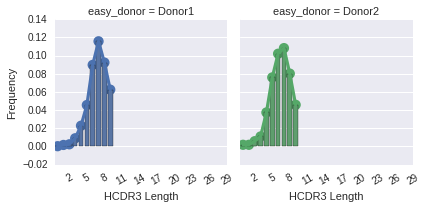

In [7]:
g = sns.FacetGrid(collection_lengths, col="easy_donor", hue='easy_donor')
g = g.map(sns.barplot, 'length', 'freq')
g = g.map(sns.pointplot, 'length', 'freq')
g.set(xticks=range(2,31,3),xticklabels=range(2,31,3))
g.set_axis_labels("HCDR3 Length","Frequency")
g.set_xticklabels(rotation=30)

In [8]:
prices = pd.read_csv('../data/EuStockMarkets.csv')
prices = prices.rename(columns={'Index': 'Year'}).set_index('Year')
logR = np.log(prices).diff().dropna()

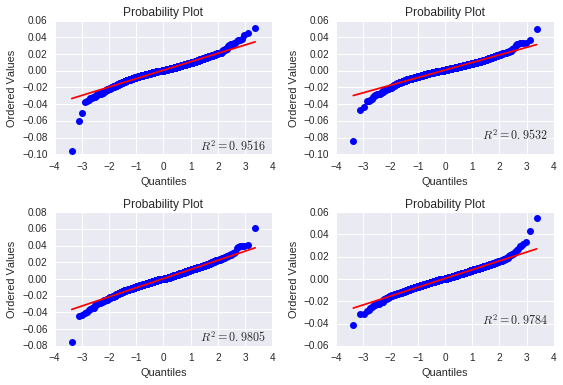

In [9]:
# grid of probability plots using scipy stats 
def draw():
    #    A t distribution with small degrees of freedom:
    ax1 = plt.subplot(221)
    res = stats.probplot(logR['DAX'], plot=plt)

    ax2 = plt.subplot(222)
    res = stats.probplot(logR['SMI'], plot=plt)

    ax3 = plt.subplot(223)
    res = stats.probplot(logR['CAC'], plot=plt)

    ax4 = plt.subplot(224)
    res = stats.probplot(logR['FTSE'], plot=plt)
    plt.tight_layout()
draw()

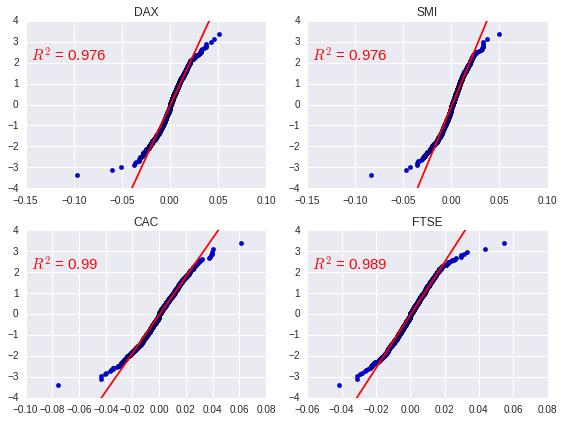

In [10]:
# drawing probability plots with matplotlib, axes reversed (as they are in R)
# drawing with just scipy.stats and matplotlib
def draw():
    fig = plt.figure(figsize=(8,6))
    for i,name in enumerate(logR.columns):
        ax = plt.subplot(221+i)
        (x,y),(slope,intercept,r) = stats.probplot(logR[name])
        slope, intercept = 1/slope, -intercept/slope
        plt.scatter(y,x)
        plt.plot(y,y*slope+intercept, 'r')
        ax.set_title(name)
        ax.set_ylim(-4,4)
        ax.text(0.02, 0.85, r"$R^2$ = {:.3}".format(r), verticalalignment='top', horizontalalignment='left',
                transform=ax.transAxes, color='red', fontsize=15)
    plt.tight_layout()
draw()

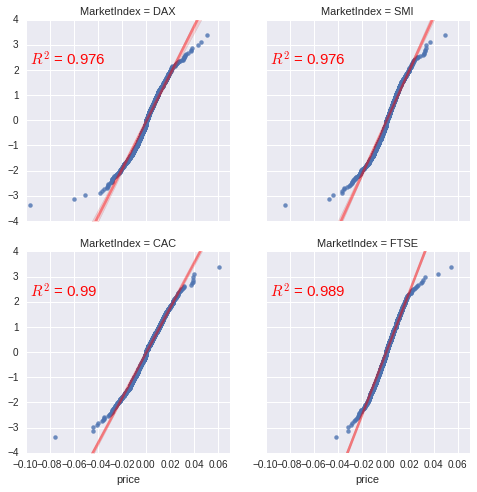

In [11]:
# using seaborn's regplot and facetgrid and pandas pd.melt, which is essentially the inverse of a pivot table
def qqplot(data,**kwargs):
    (x,y),(slope,intercept,r) = stats.probplot(data.values)
    sns.regplot(y,x, line_kws={'color': 'r', 'alpha': 0.4})
    ax = plt.gca() #returns current axes to draw on
    ax.text(0.02, 0.85, r"$R^2$ = {:.3}".format(r), verticalalignment='top', horizontalalignment='left',
                transform=ax.transAxes, color='red', fontsize=15)
    
def draw():
    melted = pd.melt(logR, var_name='MarketIndex', value_name='price')
    g = sns.FacetGrid(melted, col="MarketIndex", col_wrap=2, size=3.5)
    g = g.map(qqplot, 'price').set(ylim=(-4,4),xlim=(-.1,.07))

draw()

In [12]:
tips = sns.load_dataset("tips")

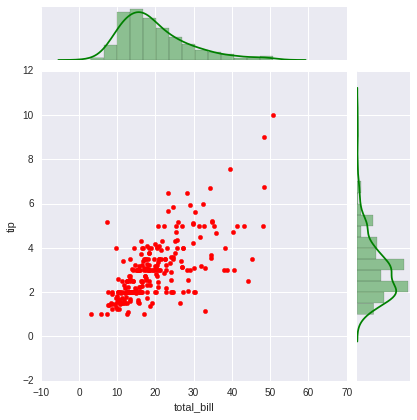

In [13]:
def customJoint(x,y,*args,**kwargs):
    plt.scatter(x,y,color='red')
def customMarginal(x,*args,**kwargs):
    sns.distplot(x,color='green', vertical=kwargs['vertical'])
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(customJoint, customMarginal)

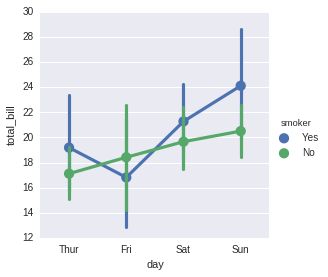

In [14]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

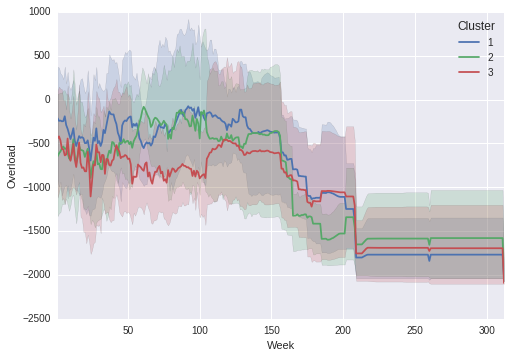

In [15]:
# first normal error band plot
cluster_overload = pd.read_csv("TSplot.csv", delim_whitespace=True)
cluster_overload['Unit'] = cluster_overload.groupby(['Cluster','Week']).cumcount()
ax = sns.tsplot(time='Week',value="Overload", condition="Cluster", ci=100, unit="Unit", data=cluster_overload)

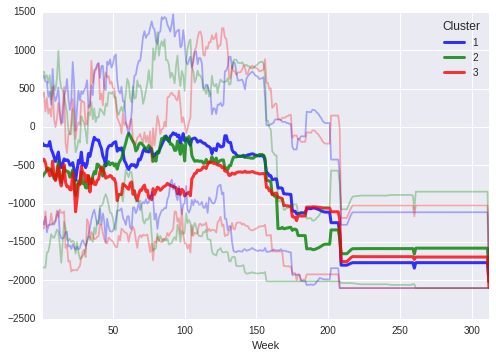

In [16]:
# then explicitly calculate max and min
cluster_overload = pd.read_csv("TSplot.csv", delim_whitespace=True)
grouped = cluster_overload.groupby(['Cluster','Week'],as_index=False)
stats = grouped.agg(['min','mean','max']).unstack().T
stats.index = stats.index.droplevel(0)

colors = ['b','g','r']
ax = stats.loc['mean'].plot(color=colors, alpha=0.8, linewidth=3)
stats.loc['max'].plot(ax=ax,color=colors,legend=False, alpha=0.3)
stats.loc['min'].plot(ax=ax,color=colors,legend=False, alpha=0.3);

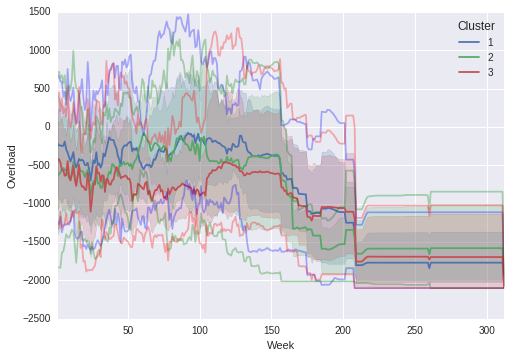

In [17]:
cluster_overload = pd.read_csv("TSplot.csv", delim_whitespace=True)
grouped = cluster_overload.groupby(['Cluster','Week'],as_index=False)

#do not want the 'Unit' column in grouped
stats = grouped.agg(['min','mean','max']).unstack().T
stats.index = stats.index.droplevel(0)

cluster_overload['Unit'] = cluster_overload.groupby(['Cluster','Week']).cumcount()

colors = ['b','g','r']
ax = sns.tsplot(time='Week',value="Overload", condition="Cluster", ci=100, unit="Unit", data=cluster_overload)
stats.loc['max'].plot(ax=ax,color=colors,legend=False, alpha=0.3)
stats.loc['min'].plot(ax=ax,color=colors,legend=False, alpha=0.3);

In [18]:
# my first monkey patch
import seaborn.timeseries
def _plot_std_band(*args, central_data=None, ci=None, data=None, **kwargs):
    std = data.std(axis=0)
    ci = np.asarray((central_data - 3*std, central_data + 3*std))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)
    
seaborn.timeseries._plot_std_band = _plot_std_band

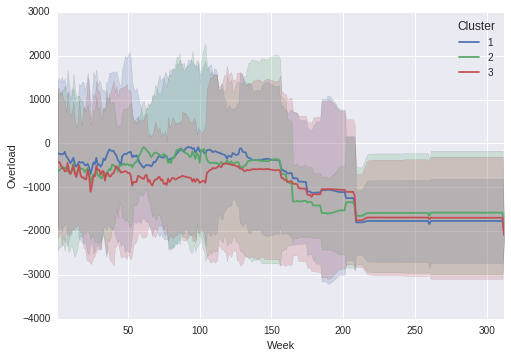

In [19]:
cluster_overload = pd.read_csv("TSplot.csv", delim_whitespace=True)
grouped = cluster_overload.groupby(['Cluster','Week'],as_index=False)

#do not want the 'Unit' column in grouped
stats = grouped.agg(['min','mean','max']).unstack().T
stats.index = stats.index.droplevel(0)

cluster_overload['Unit'] = cluster_overload.groupby(['Cluster','Week']).cumcount()

colors = ['b','g','r']
ax = sns.tsplot(time='Week',value="Overload", condition="Cluster", unit="Unit", data=cluster_overload,
               err_style="std_band")

In [20]:
# now writing my own!!
def _plot_range_band(*args, central_data=None, ci=None, data=None, **kwargs):
    upper = data.max(axis=0)
    lower = data.min(axis=0)
    #import pdb; pdb.set_trace()
    ci = np.asarray((lower, upper))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)
    
seaborn.timeseries._plot_range_band = _plot_range_band

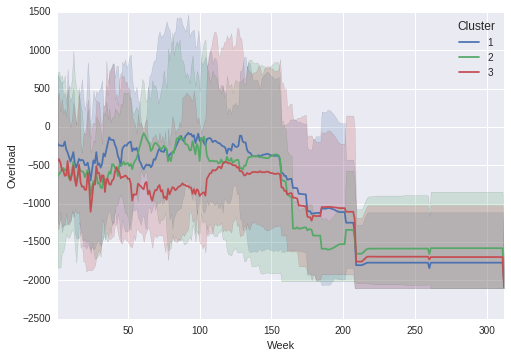

In [21]:
import pandas as pd
import seaborn as sns
import seaborn.timeseries


def _plot_range_band(*args, central_data=None, ci=None, data=None, **kwargs):
    upper = data.max(axis=0)
    lower = data.min(axis=0)
    #import pdb; pdb.set_trace()
    ci = np.asarray((lower, upper))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)
    
seaborn.timeseries._plot_range_band = _plot_range_band

cluster_overload = pd.read_csv("TSplot.csv", delim_whitespace=True)
cluster_overload['Unit'] = cluster_overload.groupby(['Cluster','Week']).cumcount()

ax = sns.tsplot(time='Week',value="Overload", condition="Cluster", unit="Unit", data=cluster_overload,
               err_style="range_band", n_boot=0)

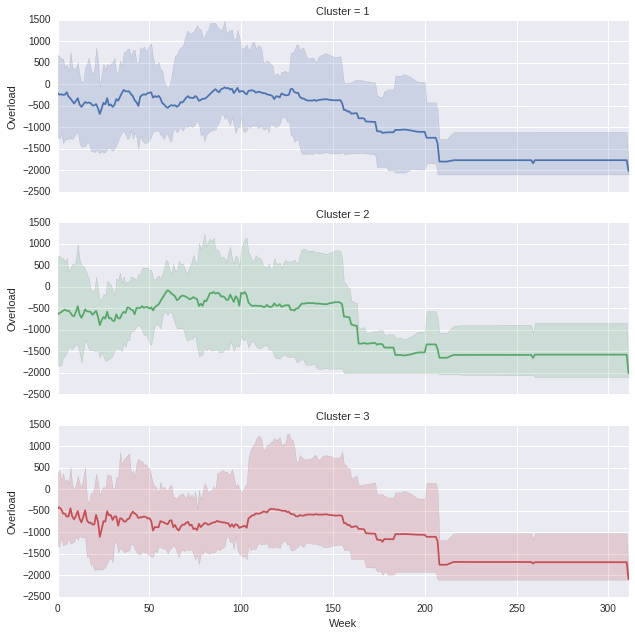

In [42]:
import pandas as pd
import seaborn as sns
import seaborn.timeseries


def _plot_range_band(*args, central_data=None, ci=None, data=None, **kwargs):
    upper = data.max(axis=0)
    lower = data.min(axis=0)
    #import pdb; pdb.set_trace()
    ci = np.asarray((lower, upper))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)
    
seaborn.timeseries._plot_range_band = _plot_range_band

cluster_overload = pd.read_csv("TSplot.csv", delim_whitespace=True)
cluster_overload['subindex'] = cluster_overload.groupby(['Cluster','Week']).cumcount()

def customPlot(*args,**kwargs):
    df = kwargs.pop('data')
    pivoted = df.pivot(index='subindex', columns='Week', values='Overload')
    ax = sns.tsplot(pivoted.values, err_style="range_band", n_boot=0, color=kwargs['color'])

g = sns.FacetGrid(cluster_overload, row="Cluster", sharey=False, hue='Cluster', aspect=3)
g = g.map_dataframe(customPlot, 'Week', 'Overload','subindex')

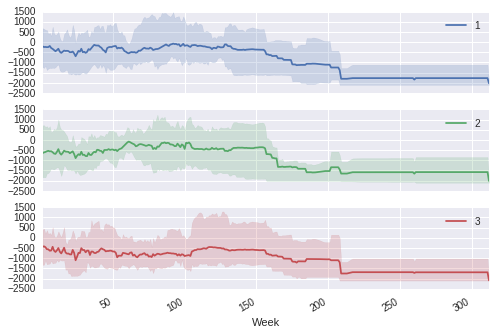

In [51]:
df = pd.read_csv("TSplot.csv", delim_whitespace=True)
grouped = df.groupby(["Cluster", "Week"]).agg({'Overload': ['min', 'mean', 'max']}).unstack("Cluster")

# Plot with sublot since it is more readable
axes = grouped.loc[:,('Overload', 'mean')].plot(subplots=True)

# Getting the color palette used
palette = sns.color_palette()

for (i,ax) in enumerate(axes):
    ax.fill_between(grouped.index, grouped.loc[:,('Overload', 'min', i + 1)], 
                    grouped.loc[:,('Overload', 'max', i + 1 )], alpha=.2, color=palette[i])

In [59]:
ax.

['3']

In [40]:
?cluster_overload.cumcount

Object `cluster_overload.cumcount` not found.
